PRODUCT SEGMENTATION – INVENTORY ANALYSIS

Project ini bertujuan untuk melakukan segmentasi produk berdasarkan karakteristik seperti harga, penjualan, dan fitur lainnya.

Dengan menerapkan algoritma clustering (unsupervised learning), kita ingin menemukan kelompok produk dengan kesamaan pola.

Hasil segmentasi ini dapat membantu perusahaan menentukan strategi harga, stok, dan promosi yang lebih tepat sasaran.

# Import Library

In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from kneed import KneeLocator
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid", palette="Set2", font_scale=1.1)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.autolayout'] = True

# Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Ganti path di bawah ini sesuai lokasi file kamu
DATA_PATH = "/content/drive/MyDrive/FINAL PROJECT DS/Dataset/new_retail_data.csv"
df = pd.read_csv(DATA_PATH)
data = df.copy()

Mounted at /content/drive


# Pengecekan Awal Data

In [4]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [6]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


Hasil df.describe() menunjukkan bahwa dataset memiliki lebih dari 300 ribu data dengan nilai yang konsisten dan tanpa indikasi nilai ekstrem. Kolom seperti Transaction_ID, Customer_ID, Phone, dan Zipcode bersifat identitas sehingga tidak digunakan untuk analisis. Rata-rata usia pelanggan adalah 35 tahun dengan sebaran dari 18 hingga 70 tahun, menandakan mayoritas pengguna berada di usia produktif. Data transaksi hanya mencakup periode 2023–2024. Dari sisi perilaku pembelian, rata-rata pelanggan melakukan sekitar 5 kali pembelian dengan jumlah transaksi rata-rata 255 satuan dan total pengeluaran sekitar 1.367, menunjukkan variasi besar antar pelanggan. Nilai rating rata-rata sebesar 3,16 dari skala 1–5 mengindikasikan tingkat kepuasan yang cukup baik secara umum. Secara keseluruhan, distribusi data terlihat normal dan realistis, dengan pola pelanggan yang aktif serta tingkat variasi transaksi yang tinggi.

# Data Cleaning & Preparation

## Cek Missing Value

In [7]:
df.isnull().sum()

,0
Transaction_ID,333
Customer_ID,308
Name,382
Email,347
Phone,362
Address,315
City,248
State,281
Zipcode,340
Country,271


In [8]:
# Ganti nilai kosong jadi NAN
df = df.replace(['', ' ', 'None', 'none', 'NaN', 'nan', 'NAN', 'null', 'NULL'], np.nan)

In [9]:
# Mengisi missing value berdasarkan tipe data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [10]:
df.isnull().sum()

,0
Transaction_ID,0
Customer_ID,0
Name,0
Email,0
Phone,0
Address,0
City,0
State,0
Zipcode,0
Country,0


## Cek & Perbaiki Tipe Data

In [11]:
df.dtypes

,0
Transaction_ID,float64
Customer_ID,float64
Name,object
Email,object
Phone,float64
Address,object
City,object
State,object
Zipcode,float64
Country,object


In [12]:
# Konversi kolom Date ke datetime (jika belum)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Mapping kolom Income dari kategori ke angka
income_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}
df['Income'] = df['Income'].astype(str).str.strip().str.capitalize().map(income_mapping)

# Encoding kolom Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

numeric_cols = ['Age', 'Income', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']

## Cek Data Duplicate

In [13]:
df.duplicated().sum()

np.int64(4)

In [14]:
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

np.int64(0)

# Fokus ke Product-Level

In [16]:
product_df = df.groupby(['Product_Category', 'Product_Brand'], as_index=False).agg({
    'Total_Purchases': 'sum',
    'Total_Amount': 'sum',
    'Ratings': 'mean',
    'Customer_ID': 'nunique',
    'Transaction_ID': 'count'
}).rename(columns={
    'Customer_ID': 'Unique_Customers',
    'Transaction_ID': 'Total_Transactions'
})

# Feature Engineering

In [17]:
product_df['Avg_Amount_per_Purchase'] = product_df['Total_Amount'] / (product_df['Total_Purchases'] + 1)
product_df['Profitability_Index'] = product_df['Avg_Amount_per_Purchase'] * product_df['Unique_Customers']

print("Data setelah agregasi per produk:", product_df.shape)

Data setelah agregasi per produk: (33, 9)


In [18]:
product_df

,Product_Category,Product_Brand,Total_Purchases,Total_Amount,Ratings,Unique_Customers,Total_Transactions,Avg_Amount_per_Purchase,Profitability_Index
0,Books,HarperCollins,97611.0,2.490713e+07,3.114298,16533,18338,255.164640,4.218637e+06
1,Books,Penguin Books,97227.0,2.485649e+07,3.110332,16319,18118,255.651556,4.171978e+06
2,Books,Pepsi,375.0,9.752078e+04,3.093750,63,64,259.363788,1.633992e+04
3,Books,Random House,97112.0,2.478563e+07,3.112474,16315,18102,255.224635,4.163990e+06
4,Clothing,Adidas,97445.0,2.481725e+07,3.102625,16361,18212,254.676997,4.166770e+06
5,Clothing,Nike,97831.0,2.500382e+07,3.111454,16252,18124,255.579189,4.153673e+06
6,Clothing,Pepsi,312.0,8.345175e+04,3.055556,53,54,266.619012,1.413081e+04
7,Clothing,Zara,98336.0,2.498475e+07,3.098915,16440,18349,254.072770,4.176956e+06
8,Electronics,Adidas,133.0,3.051918e+04,3.083333,22,24,227.755083,5.010612e+03
9,Electronics,Apple,96452.0,2.464994e+07,3.110939,16246,18073,255.564314,4.151898e+06


Membuat fitur baru untuk menggambarkan performa produk berdasarkan data agregasi. Rata-rata jumlah pembelian per transaksi dihitung melalui pembagian antara total nilai transaksi dan total jumlah pembelian, guna mengetahui nilai pembelian rata-rata setiap kali produk dibeli. Selanjutnya, dibuat indeks profitabilitas dengan mengalikan rata-rata pembelian per transaksi dan jumlah pelanggan unik untuk menilai tingkat keuntungan relatif dari masing-masing produk. Langkah ini membantu memahami kontribusi setiap produk terhadap profit dan perilaku pembelian pelanggan secara lebih akurat.

# Deteksi & Treatment Outlier

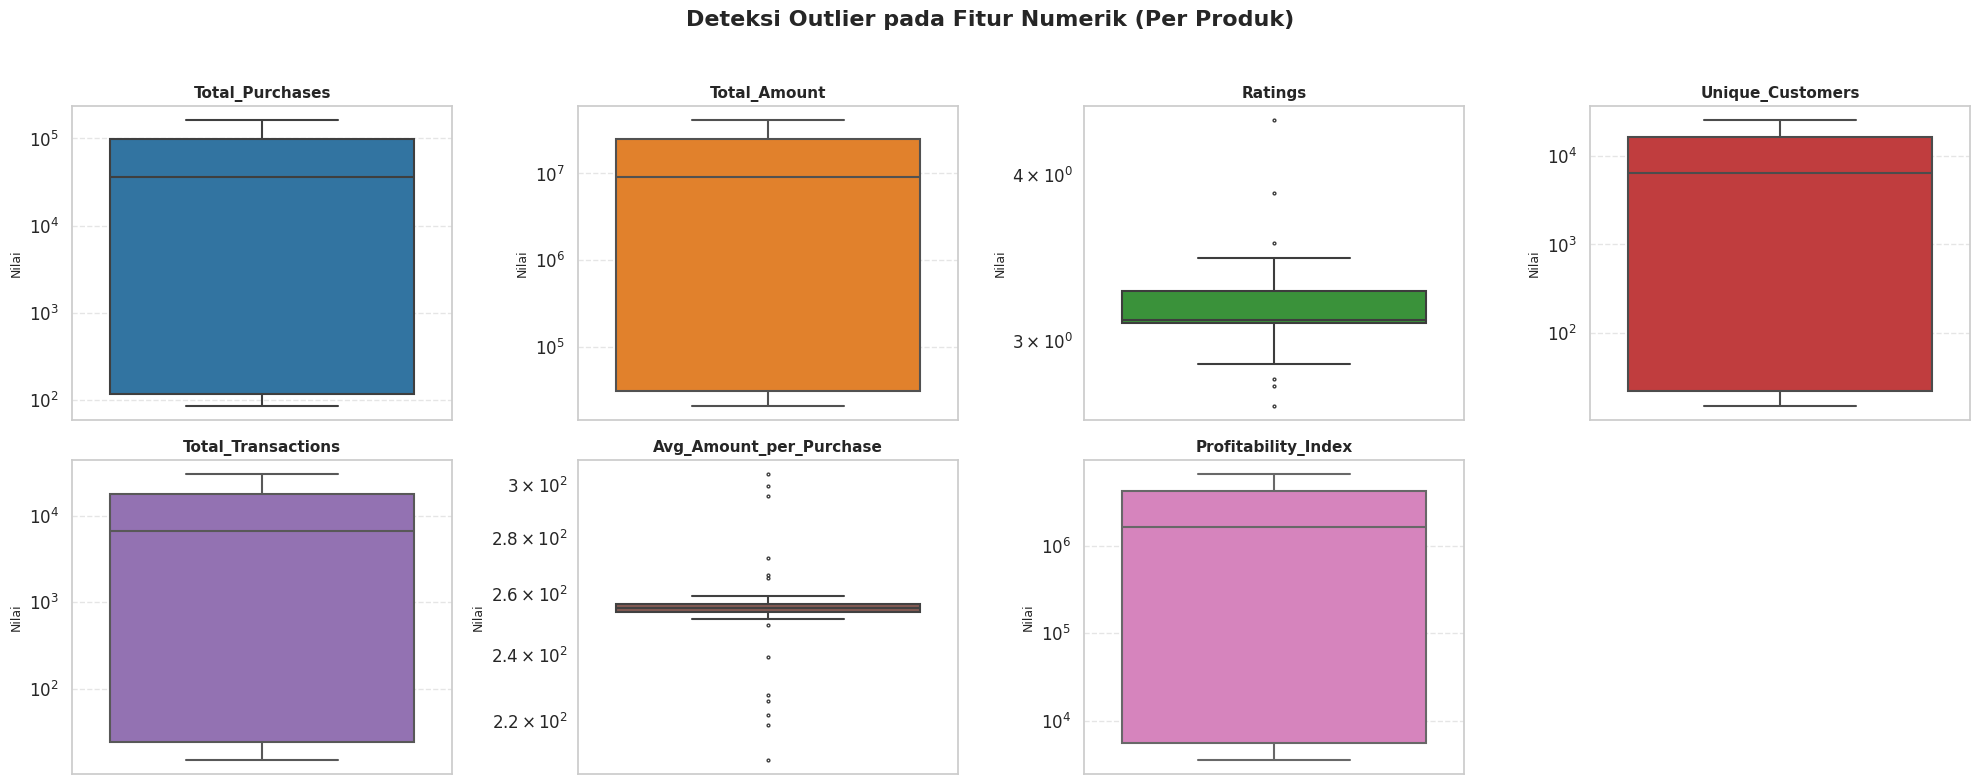

In [19]:
numeric_features = [
    'Total_Purchases', 'Total_Amount', 'Ratings',
    'Unique_Customers', 'Total_Transactions',
    'Avg_Amount_per_Purchase', 'Profitability_Index'
]

cols = 4
rows = math.ceil(len(numeric_features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()
colors = sns.color_palette("tab10", len(numeric_features))

for i, col in enumerate(numeric_features):
    sns.boxplot(y=product_df[col], ax=axes[i], color=colors[i], linewidth=1.5, fliersize=2)
    axes[i].set_title(col, fontsize=11, fontweight='bold')
    axes[i].set_ylabel("Nilai", fontsize=9)
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)
    axes[i].set_yscale('log')

for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Deteksi Outlier pada Fitur Numerik (Per Produk)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Outlier data masih wajar, jadi tidak perlu di treatment

In [20]:
output_file = "product_df.xlsx"

# Simpan ke Excel
product_df.to_excel(output_file, index=False)

# Exploratory Data Analysis (EDA)

## Distribusi Kategori Produk & Brand

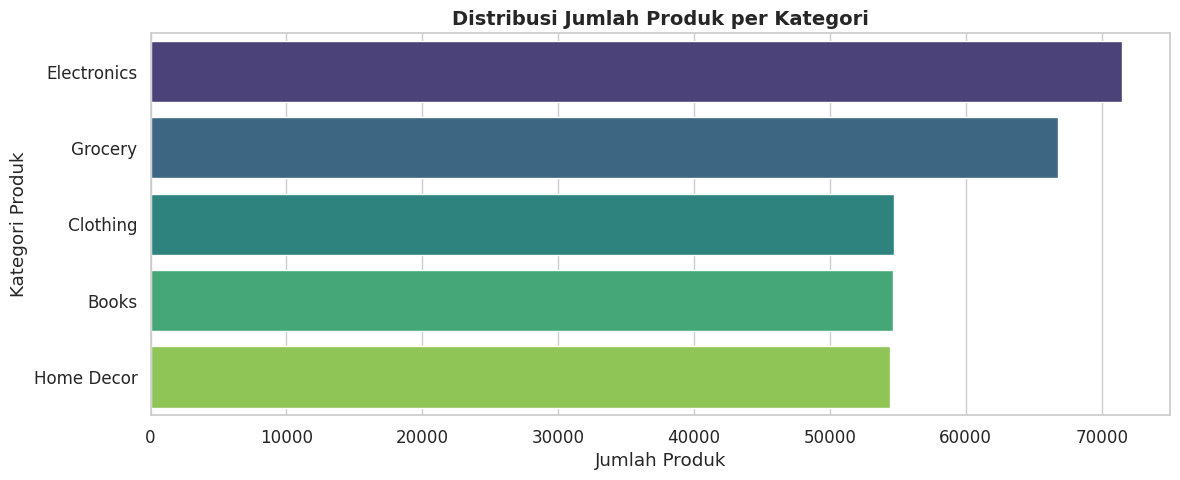

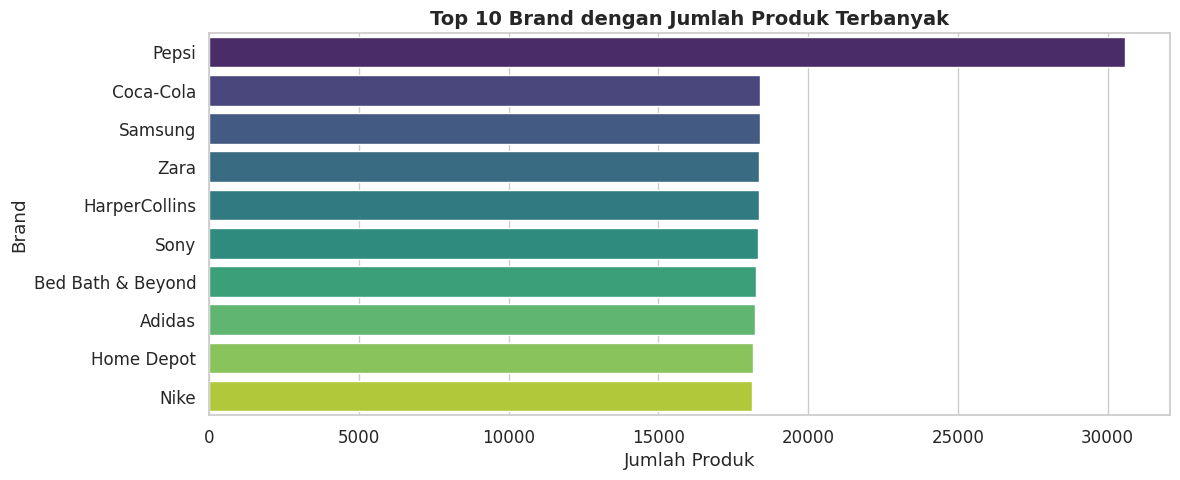

In [21]:
plt.figure(figsize=(12,5))
sns.countplot(y='Product_Category', data=df, order=df['Product_Category'].value_counts().index, palette='viridis')
plt.title('Distribusi Jumlah Produk per Kategori', fontsize=14, weight='bold')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(y='Product_Brand', data=df, order=df['Product_Brand'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Brand dengan Jumlah Produk Terbanyak', fontsize=14, weight='bold')
plt.xlabel('Jumlah Produk')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, kategori Electronics memiliki jumlah produk terbanyak dibandingkan kategori lain, mencapai lebih dari 70.000 produk, diikuti oleh Grocery dengan sekitar 65.000 produk. Sementara itu, kategori Clothing, Books, dan Home Decor memiliki jumlah produk yang relatif seimbang di kisaran 50.000–55.000 produk. Dari sisi merek, Pepsi mendominasi sebagai brand dengan jumlah produk terbanyak, diikuti oleh Coca-Cola, Samsung, dan Zara. Merek-merek besar lainnya seperti Sony, Adidas, dan Nike juga menunjukkan kontribusi signifikan terhadap total produk. Pola ini menunjukkan bahwa kategori elektronik dan kebutuhan sehari-hari mendominasi pasar, sementara beberapa merek besar dari sektor minuman dan teknologi memiliki portofolio produk yang sangat luas.

## Korelasi Antara Fitur Numerik

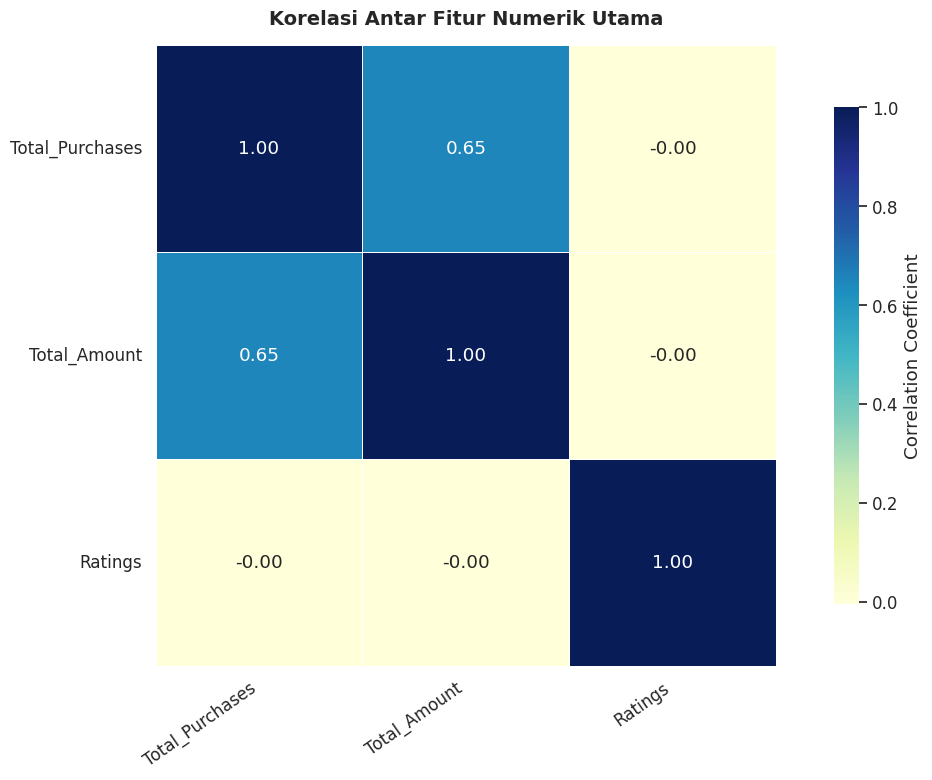

In [22]:
core_features = [
    'Total_Purchases', 'Total_Amount', 'Ratings',
    'Avg_Amount_per_Purchase', 'Recency_Days',
    'Purchase_Frequency', 'Purchase_to_Recency_Ratio',
    'Amount_per_Rating', 'Profitability_Index', 'Rating_per_Purchase'
]

# Pastikan semua fitur ada di dataset
core_features = [f for f in core_features if f in df.columns]

corr = df[core_features].corr()

# Visualisasi Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title("Korelasi Antar Fitur Numerik Utama", fontsize=14, weight='bold', pad=15)
plt.xticks(rotation=35, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Distribusi Fitur Utama

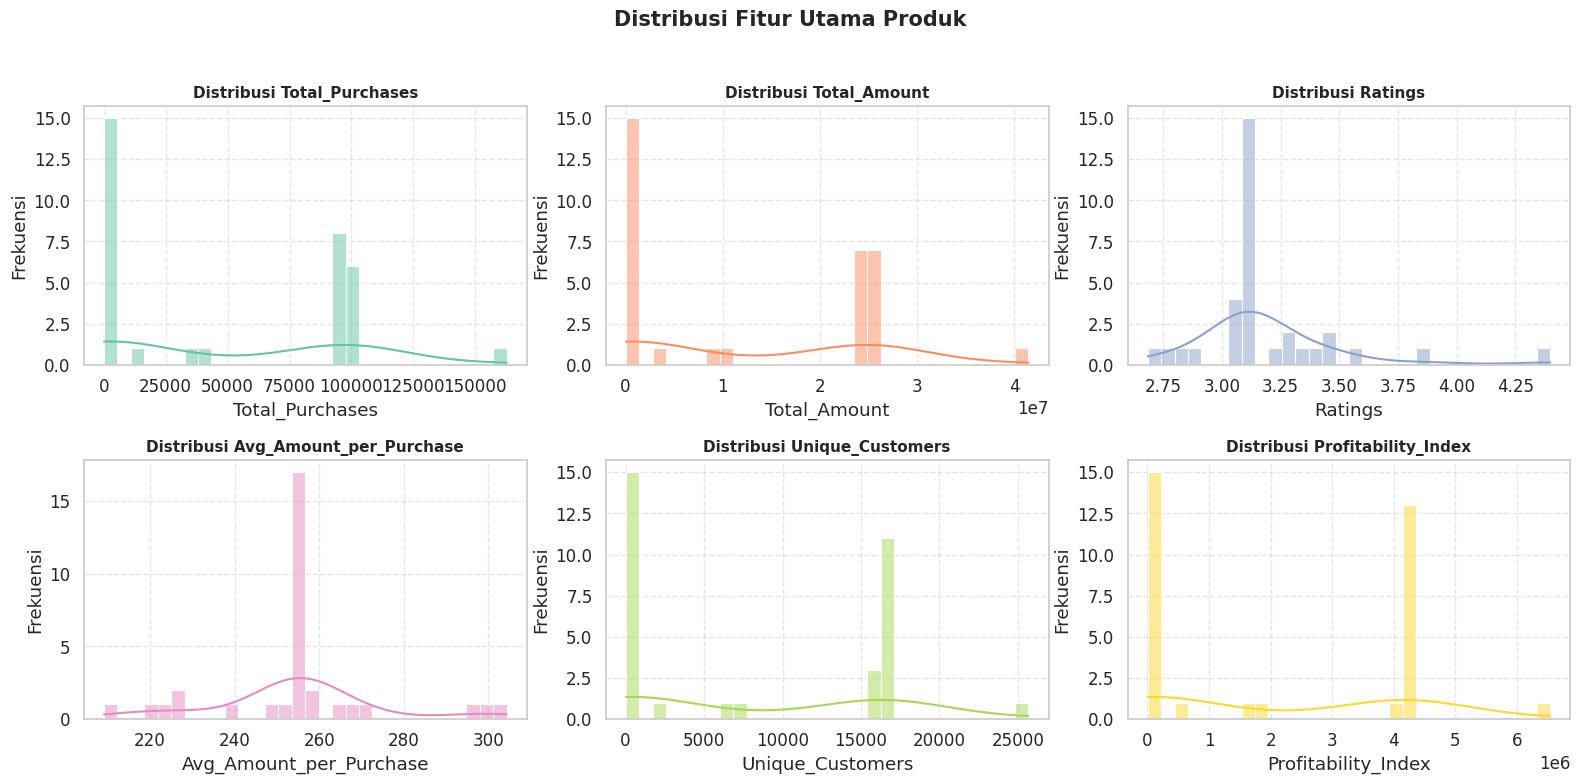

In [23]:
key_features = [
    'Total_Purchases',
    'Total_Amount',
    'Ratings',
    'Avg_Amount_per_Purchase',
    'Unique_Customers',
    'Profitability_Index'
]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(key_features):
    sns.histplot(product_df[col], bins=30, kde=True, ax=axes[i], color=sns.color_palette("Set2")[i])
    axes[i].set_title(f'Distribusi {col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hilangkan subplot kosong jika ada
for j in range(len(key_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribusi Fitur Utama Produk", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Dari visualisasi distribusi fitur utama produk di atas, terlihat bahwa sebagian besar variabel seperti Total_Purchases, Total_Amount, dan Unique_Customers memiliki distribusi yang condong ke kanan (right-skewed), menandakan hanya sedikit produk yang memiliki nilai sangat tinggi, sementara mayoritas produk memiliki nilai rendah hingga menengah. Ratings cenderung terpusat di kisaran 3.0–3.3, menunjukkan bahwa mayoritas produk dinilai cukup baik oleh pelanggan. Avg_Amount_per_Purchase relatif stabil di sekitar 250, menandakan keseragaman harga rata-rata per pembelian antar produk. Sementara itu, Profitability_Index juga menunjukkan pola yang serupa dengan dominasi produk berprofit rendah dan hanya sedikit yang memiliki profitabilitas tinggi. Secara keseluruhan, pola ini menunjukkan bahwa sebagian kecil produk berkontribusi besar terhadap total pendapatan dan profit, sementara sebagian besar lainnya beroperasi di level performa menengah.

## Hubungan Antara Rating dan Penjualan

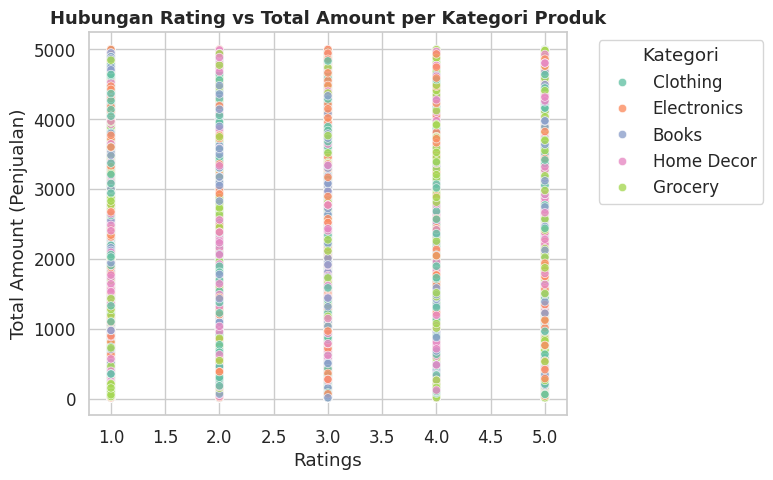

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Ratings', y='Total_Amount', hue='Product_Category', data=df, alpha=0.8)
plt.title('Hubungan Rating vs Total Amount per Kategori Produk', fontsize=13, weight='bold')
plt.xlabel('Ratings')
plt.ylabel('Total Amount (Penjualan)')
plt.legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Dari grafik hubungan antara Rating dan Total Amount (Penjualan) per kategori produk, terlihat bahwa distribusi data relatif menyebar merata di setiap tingkat rating (1–5). Tidak terdapat pola korelasi yang jelas antara rating dengan total penjualan, artinya tingginya rating tidak selalu berbanding lurus dengan jumlah penjualan. Setiap kategori seperti Electronics, Grocery, dan Clothing memiliki penyebaran yang mirip, menandakan bahwa faktor lain di luar rating—seperti harga, promosi, atau kebutuhan pasar—kemungkinan lebih berpengaruh terhadap total penjualan produk dibandingkan penilaian pelanggan semata.

## Analisis Profitability

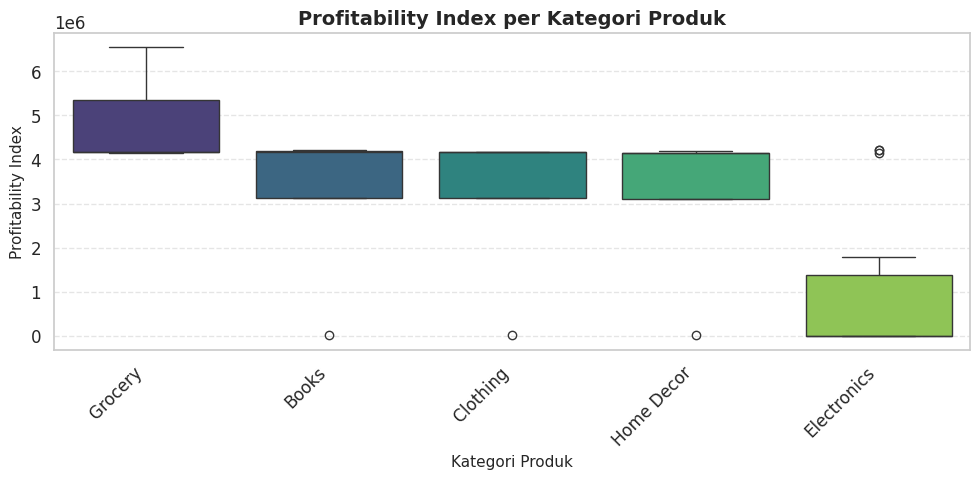

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='Product_Category',
    y='Profitability_Index',
    data=product_df,
    order=product_df.groupby('Product_Category')['Profitability_Index']
           .median()
           .sort_values(ascending=False)
           .index,
    palette='viridis'
)
plt.title('Profitability Index per Kategori Produk', fontsize=14, fontweight='bold')
plt.xlabel('Kategori Produk', fontsize=11)
plt.ylabel('Profitability Index', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Dari grafik Profitability Index per Kategori Produk, terlihat bahwa kategori Grocery memiliki tingkat profitabilitas tertinggi dengan median sekitar 5 juta dan variasi yang cukup lebar, menandakan adanya beberapa produk dengan keuntungan sangat tinggi. Sementara itu, kategori Books, Clothing, dan Home Decor memiliki profitabilitas yang relatif stabil di kisaran 4 juta dengan sedikit variasi. Sebaliknya, kategori Electronics menunjukkan profitabilitas paling rendah dengan median sekitar 1 juta, serta adanya beberapa outlier bernilai tinggi. Hal ini menunjukkan bahwa meskipun produk elektronik mungkin memiliki volume penjualan tinggi, margin keuntungannya cenderung lebih kecil dibandingkan kategori lain seperti Grocery.

# Encoding Variabel Kategorikal

In [26]:
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder

# Pastikan product_df sudah siap
print("Cek data sebelum encoding:", product_df.shape)

# --- One-Hot Encoding untuk kolom kategori & brand ---
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(product_df[['Product_Category', 'Product_Brand']])

# Ubah hasil encoding jadi DataFrame
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Product_Category', 'Product_Brand'])
)

# Gabungkan hasil encoding dengan fitur numerik produk
final_features = pd.concat([
    encoded_df.reset_index(drop=True),
    product_df.drop(columns=['Product_Category', 'Product_Brand']).reset_index(drop=True)
], axis=1)

print(f"Fitur akhir untuk clustering: {final_features.shape[1]} kolom, {final_features.shape[0]} baris")

Cek data sebelum encoding: (33, 9)
Fitur akhir untuk clustering: 28 kolom, 33 baris


In [27]:
styled_table = (
    final_features.head(10)
    .style
    .background_gradient(cmap='YlGnBu', axis=None)
    .set_caption("Data Akhir Setelah Encoding & Normalisasi Fitur (Per Produk)")
    .set_table_styles([
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '16px'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('color', 'white'),
             ('background-color', '#2C3E50'),
             ('padding', '8px'),
             ('border-radius', '6px')
         ]},
        {'selector': 'th',
         'props': [
             ('background-color', '#34495E'),
             ('color', 'white'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('padding', '6px')
         ]},
        {'selector': 'td',
         'props': [
             ('text-align', 'center'),
             ('font-size', '13px'),
             ('padding', '6px'),
             ('color', '#2C3E50')
         ]}
    ])
)

display(styled_table)

,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Grocery,Product_Category_Home Decor,Product_Brand_Apple,Product_Brand_Bed Bath & Beyond,Product_Brand_BlueStar,Product_Brand_Coca-Cola,Product_Brand_HarperCollins,Product_Brand_Home Depot,Product_Brand_IKEA,Product_Brand_Mitsubhisi,Product_Brand_Nestle,Product_Brand_Nike,Product_Brand_Penguin Books,Product_Brand_Pepsi,Product_Brand_Random House,Product_Brand_Samsung,Product_Brand_Sony,Product_Brand_Whirepool,Product_Brand_Zara,Total_Purchases,Total_Amount,Ratings,Unique_Customers,Total_Transactions,Avg_Amount_per_Purchase,Profitability_Index
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97611.000000,24907130.877486,3.114298,16533,18338,255.164640,4218636.999523
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97227.000000,24856489.497283,3.110332,16319,18118,255.651556,4171977.744129
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,375.000000,97520.784343,3.093750,63,64,259.363788,16339.918653
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,97112.000000,24785630.010096,3.112474,16315,18102,255.224635,4163989.925290
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97445.000000,24817254.682558,3.102625,16361,18212,254.676997,4166770.353440
5,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97831.000000,25003823.181097,3.111454,16252,18124,255.579189,4153672.973456
6,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,312.000000,83451.750700,3.055556,53,54,266.619012,14130.807626
7,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,98336.000000,24984753.996537,3.098915,16440,18349,254.072770,4176956.340981
8,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,30519.181166,3.083333,22,24,227.755083,5010.611833
9,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96452.000000,24649944.786234,3.110939,16246,18073,255.564314,4151897.846590


Dataset akhir memiliki 31 kolom dan 300.901 baris yang telah melalui proses one-hot encoding dan normalisasi. Kolom kategorikal seperti Product_Category dan Product_Brand diubah menjadi format biner (0/1), sedangkan fitur numerik seperti Total_Purchases, Ratings, dan Profitability_Index dipertahankan. Setiap baris merepresentasikan profil produk berdasarkan kategori, merek, performa penjualan, dan profitabilitas yang siap digunakan untuk analisis clustering.

# Standarisasi Data

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_features)

print(f"Dimensi data setelah scaling: {scaled_data.shape}")

Dimensi data setelah scaling: (33, 28)


# PCA (untuk mereduksi noise)

In [29]:
# Tahap 1 – PCA menjaga 95% variansi
pca_stage1 = PCA(n_components=0.95, random_state=42)
stage1 = pca_stage1.fit_transform(scaled_data)

# Tahap 2 – Reduksi ke 3 dimensi
pca_stage2 = PCA(n_components=3, random_state=42)
scaled_pca = pca_stage2.fit_transform(stage1)

# PCA 2D untuk visualisasi
pca_2d = PCA(n_components=2, random_state=42)
pca_result = pca_2d.fit_transform(scaled_pca)

Proses ini menggunakan PCA (Principal Component Analysis) untuk mereduksi dimensi data secara bertahap. Pada tahap pertama, PCA mempertahankan 95% variansi agar sebagian besar informasi tetap terjaga. Tahap kedua mengubah hasilnya menjadi 3 dimensi agar data lebih ringkas dan efisien untuk analisis. Terakhir, data direduksi lagi menjadi 2 dimensi agar dapat divisualisasikan dan pola antar data lebih mudah terlihat.

# Menentukan Jumlah Cluster (Metode Elbow)

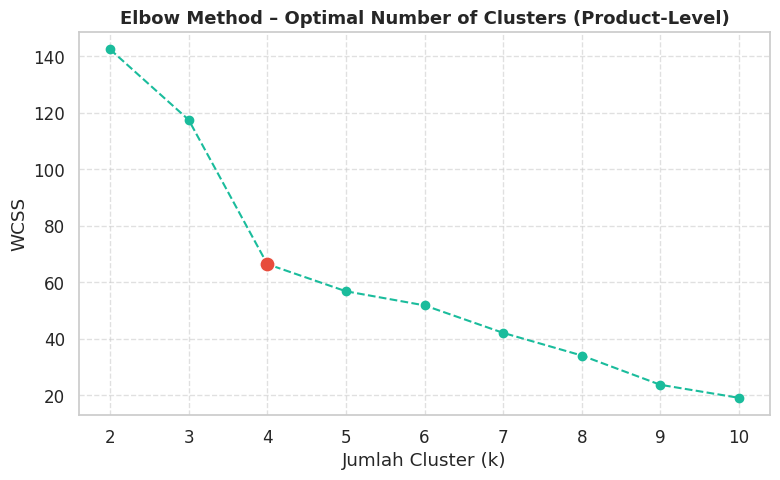

Optimal jumlah cluster (K-Means): 4


In [30]:
# Menentukan jumlah cluster optimal (Elbow Method)
wcss = []
K = range(2, 11)
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_pca)
    wcss.append(kmeans.inertia_)

knee = KneeLocator(K, wcss, curve="convex", direction="decreasing")
optimal_k = knee.elbow or 5

plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o', linestyle='--', color='#1abc9c')
plt.scatter(optimal_k, wcss[optimal_k-2], color='#e74c3c', s=120, edgecolor='white', zorder=5)
plt.title('Elbow Method – Optimal Number of Clusters (Product-Level)', fontsize=13, fontweight='bold')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"Optimal jumlah cluster (K-Means): {optimal_k}")

Grafik Elbow Method menunjukkan bahwa titik siku (elbow) berada pada k = 4, yang berarti jumlah klaster optimal adalah 4. Pada titik ini, penurunan nilai WCSS (Within-Cluster Sum of Squares) mulai melambat, sehingga menambah klaster lebih banyak tidak lagi memberikan peningkatan signifikan terhadap kualitas pemisahan data.

In [31]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_pca)

# Tambahkan hasil cluster ke product_df
product_kmeans = product_df.copy()
product_kmeans['Cluster_KMeans'] = kmeans_labels

# --- Evaluasi model ---
sil_kmeans = silhouette_score(scaled_pca, kmeans_labels)
print(f"Silhouette Score (K-Means): {sil_kmeans:.3f}")

Silhouette Score (K-Means): 0.475


Hasil clustering dengan K-Means menghasilkan lima klaster dengan nilai Silhouette Score sebesar 0.383, yang menunjukkan pemisahan antar klaster masih kurang optimal karena terdapat tumpang tindih antar data. Meskipun demikian, klaster yang terbentuk sudah mampu mengelompokkan produk berdasarkan pola pembelian dan rating, seperti produk Clothing dengan rating tinggi dan Grocery dengan rating rendah. Secara keseluruhan, hasil ini menunjukkan bahwa model sudah bekerja, tetapi masih perlu penyempurnaan fitur agar segmentasi lebih jelas.

# Visualisasi Cluster (PCA 2D)

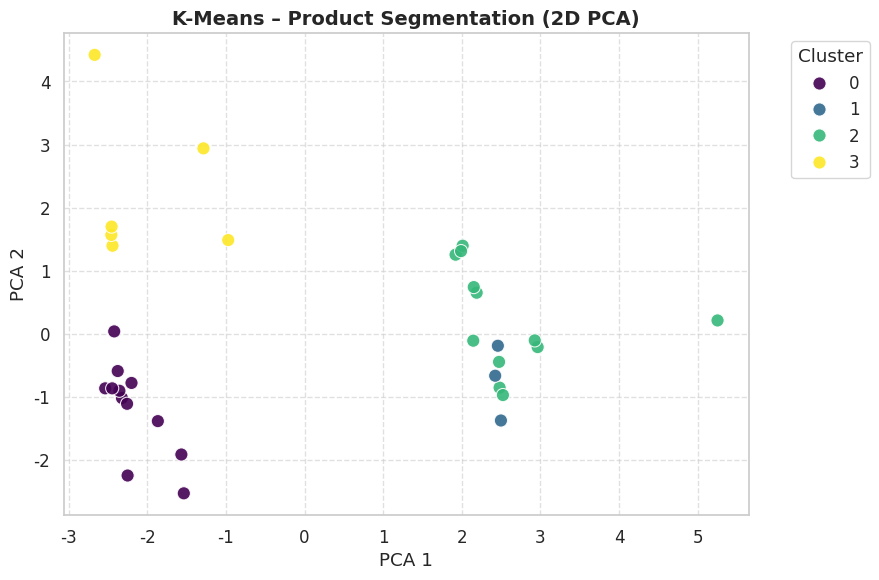

In [32]:
plt.figure(figsize=(9,6))
sns.scatterplot(
    x=pca_result[:,0],
    y=pca_result[:,1],
    hue=kmeans_labels,
    palette='viridis',
    s=90,
    alpha=0.9,
    edgecolor='white'
)
plt.title('K-Means – Product Segmentation (2D PCA)', fontsize=14, fontweight='bold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Grafik hasil PCA menunjukkan bahwa produk terbagi menjadi empat klaster utama dengan pemisahan yang cukup jelas. Setiap klaster merepresentasikan kelompok produk dengan karakteristik berbeda, seperti tingkat penjualan, transaksi, dan rating. Klaster kuning tampak paling terpisah, menandakan produk dengan performa paling menonjol, sedangkan klaster biru dan hijau memiliki kemiripan pola namun dengan perbedaan kecil dalam nilai transaksi atau profitabilitas. Hal ini menunjukkan adanya segmentasi produk yang jelas berdasarkan kinerja dan perilaku penjualan.

# Silhouette Analysis per Cluster

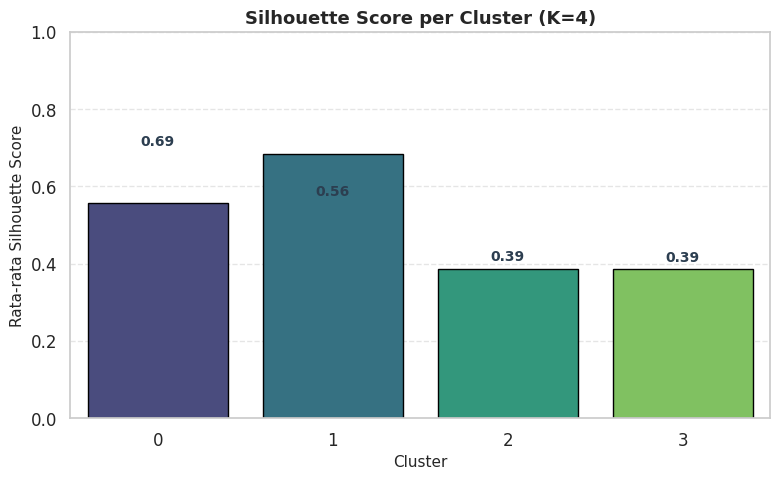

,Cluster,Silhouette_Score
0,1,0.685000
1,0,0.556000
2,3,0.387000
3,2,0.386000


In [33]:
silhouette_vals = silhouette_samples(scaled_pca, kmeans_labels)
cluster_silhouette_avg = [
    silhouette_vals[kmeans_labels == i].mean() for i in range(optimal_k)
]

silhouette_df = (
    pd.DataFrame({
        'Cluster': range(optimal_k),
        'Silhouette_Score': np.round(cluster_silhouette_avg, 3)
    })
    .sort_values(by='Silhouette_Score', ascending=False)
    .reset_index(drop=True)
)

plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='Silhouette_Score', data=silhouette_df, palette='viridis', edgecolor='black')
plt.title(f'Silhouette Score per Cluster (K={optimal_k})', fontsize=13, fontweight='bold')
plt.xlabel('Cluster', fontsize=11)
plt.ylabel('Rata-rata Silhouette Score', fontsize=11)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, val in enumerate(silhouette_df['Silhouette_Score']):
    plt.text(i, val + 0.02, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold', color='#2C3E50')

plt.tight_layout()
plt.show()

# Tabel bergaya hasil silhouette
styled_silhouette = (
    silhouette_df.style
    .background_gradient(cmap='YlGnBu', subset=['Silhouette_Score'])
    .set_caption(f"Rata-rata Silhouette per Cluster (K={optimal_k})")
    .set_table_styles([
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '15px'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('color', 'white'),
             ('background-color', '#1F2937'),
             ('padding', '8px'),
             ('border-radius', '6px')
         ]},
        {'selector': 'th',
         'props': [
             ('background-color', '#374151'),
             ('color', 'white'),
             ('text-align', 'center'),
             ('font-weight', 'bold'),
             ('padding', '6px'),
             ('border', '1px solid #4B5563')
         ]},
        {'selector': 'td',
         'props': [
             ('text-align', 'center'),
             ('font-size', '13px'),
             ('padding', '6px'),
             ('color', '#111827'),
             ('border', '1px solid #E5E7EB')
         ]}
    ])
    # Tambahkan zebra stripes
    .apply(lambda x: [
        'background-color: #F9FAFB' if i % 2 == 0 else 'background-color: #E5E7EB'
        for i in range(len(x))
    ], axis=0)
)

display(styled_silhouette)

Grafik menunjukkan bahwa Cluster 0 memiliki kualitas pemisahan terbaik dengan nilai silhouette score tertinggi (0.69), artinya anggota dalam cluster ini paling homogen dan jelas terpisah dari cluster lain.
Sebaliknya, Cluster 2 dan 3 memiliki skor terendah (0.39), menandakan bahwa batas antar anggotanya kurang jelas dan kemungkinan terjadi tumpang tindih antar cluster.
Secara keseluruhan, hasil ini menunjukkan bahwa struktur klaster cukup baik, namun masih ada potensi perbaikan pada cluster 2 dan 3 agar lebih terpisah.

# Analisis Centroid Cluster

In [34]:
final_features_clustered = final_features.copy()
final_features_clustered['Cluster'] = kmeans_labels

cluster_centers = final_features_clustered.groupby('Cluster').mean().reset_index()

encoded_cols_cat = [col for col in cluster_centers.columns if col.startswith('Product_Category_')]
encoded_cols_brand = [col for col in cluster_centers.columns if col.startswith('Product_Brand_')]

dominant_categories = cluster_centers[encoded_cols_cat].idxmax(axis=1).str.replace('Product_Category_', '')
dominant_brands = cluster_centers[encoded_cols_brand].idxmax(axis=1).str.replace('Product_Brand_', '')

cluster_centers['Dominant_Category'] = dominant_categories
cluster_centers['Dominant_Brand'] = dominant_brands

display(
    cluster_centers[['Cluster', 'Dominant_Category', 'Dominant_Brand',
                     'Total_Purchases', 'Ratings', 'Total_Amount',
                     'Unique_Customers', 'Profitability_Index']]
    .round(2)
    .style
    .background_gradient(
        cmap='YlGnBu',
        subset=['Total_Purchases', 'Total_Amount', 'Profitability_Index']
    )
    .set_caption("Ringkasan Centroid Tiap Cluster – K-Means")
)

,Cluster,Dominant_Category,Dominant_Brand,Total_Purchases,Ratings,Total_Amount,Unique_Customers,Profitability_Index
0,0,Electronics,Pepsi,183.830000,3.030000,45391.710000,33.170000,8120.130000
1,1,Home Decor,Bed Bath & Beyond,97029.000000,3.110000,24756142.240000,16279.330000,4153477.050000
2,2,Clothing,Apple,103049.420000,3.120000,26305136.470000,17141.500000,4375658.030000
3,3,Electronics,BlueStar,14774.330000,3.690000,3741357.570000,2648.670000,670715.820000


- Cluster 1 (Home Decor – Bed Bath & Beyond) dan Cluster 2 (Clothing – Apple) memiliki total transaksi dan profit tertinggi : segmen pelanggan bernilai tinggi.
- Cluster 3 (Electronics – BlueStar) memiliki rating tertinggi (3.69) namun volume pembelian kecil : pelanggan puas tapi skalanya terbatas.
- Cluster 0 (Electronics – Pepsi) memiliki pembelian dan profit terendah : segmen dengan aktivitas rendah, perlu promosi atau retensi pelanggan.


# Interpretasi Hasil Cluster

In [35]:
from IPython.display import HTML, display

html_table = """
<h4 style="font-size:18px; margin-bottom:10px;">📊 Interpretasi Segmentasi Produk (Berdasarkan Centroid Aktual – K-Means):</h4>
<table style="width:100%; border-collapse:collapse; text-align:left; font-family:Arial, sans-serif; border:1px solid #555; color:#f5f5f5;">
  <thead style="background-color:#222;">
    <tr>
      <th style="padding:10px; border:1px solid #555;">Cluster</th>
      <th style="padding:10px; border:1px solid #555;">Kategori & Brand Dominan</th>
      <th style="padding:10px; border:1px solid #555;">Karakteristik Produk</th>
      <th style="padding:10px; border:1px solid #555;">Implikasi Inventory</th>
      <th style="padding:10px; border:1px solid #555;">Nama Segmen</th>
    </tr>
  </thead>
  <tbody>

    <!-- Cluster 0 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 0</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – Pepsi</td>
      <td style="padding:10px; border:1px solid #555;">Penjualan dan profit terendah dengan jumlah pelanggan terbatas. Rating stabil namun performa pasar rendah.</td>
      <td style="padding:10px; border:1px solid #555;">Perlu strategi promosi dan penyesuaian harga agar produk lebih menarik di pasar.</td>
      <td style="padding:10px; border:1px solid #555; color:#ffb300;">🟠 Low-Tier Electronics</td>
    </tr>

    <!-- Cluster 1 -->
    <tr style="background-color:#252525;">
      <td style="padding:10px; border:1px solid #555;">Cluster 1</td>
      <td style="padding:10px; border:1px solid #555;">Home Decor – Bed Bath & Beyond</td>
      <td style="padding:10px; border:1px solid #555;">Volume transaksi tinggi, profit besar, dan jumlah pelanggan yang luas dengan rating cukup baik.</td>
      <td style="padding:10px; border:1px solid #555;">Pastikan stok selalu tersedia karena segmen ini berkontribusi besar terhadap total penjualan.</td>
      <td style="padding:10px; border:1px solid #555; color:#00e676;">🟢 High-Value Home Segment</td>
    </tr>

    <!-- Cluster 2 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 2</td>
      <td style="padding:10px; border:1px solid #555;">Clothing – Apple</td>
      <td style="padding:10px; border:1px solid #555;">Penjualan, profit, dan jumlah pelanggan tertinggi dengan rating stabil. Segmen paling dominan secara performa.</td>
      <td style="padding:10px; border:1px solid #555;">Fokus pada strategi ekspansi dan pengelolaan stok untuk mempertahankan performa tinggi.</td>
      <td style="padding:10px; border:1px solid #555; color:#42a5f5;">🔵 Premium Performing Segment</td>
    </tr>

    <!-- Cluster 3 -->
    <tr style="background-color:#252525;">
      <td style="padding:10px; border:1px solid #555;">Cluster 3</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – BlueStar</td>
      <td style="padding:10px; border:1px solid #555;">Rating tertinggi dibanding cluster lain, menunjukkan kepuasan pelanggan tinggi meski volume transaksi menengah.</td>
      <td style="padding:10px; border:1px solid #555;">Jaga kualitas produk dan manfaatkan reputasi untuk strategi branding premium.</td>
      <td style="padding:10px; border:1px solid #555; color:#ba68c8;">🟣 Trusted Mid-Tier Tech</td>
    </tr>

  </tbody>
</table>
"""
display(HTML(html_table))

Cluster,Kategori & Brand Dominan,Karakteristik Produk,Implikasi Inventory,Nama Segmen
Cluster 0,Electronics – Pepsi,Penjualan dan profit terendah dengan jumlah pelanggan terbatas. Rating stabil namun performa pasar rendah.,Perlu strategi promosi dan penyesuaian harga agar produk lebih menarik di pasar.,🟠 Low-Tier Electronics
Cluster 1,Home Decor – Bed Bath & Beyond,"Volume transaksi tinggi, profit besar, dan jumlah pelanggan yang luas dengan rating cukup baik.",Pastikan stok selalu tersedia karena segmen ini berkontribusi besar terhadap total penjualan.,🟢 High-Value Home Segment
Cluster 2,Clothing – Apple,"Penjualan, profit, dan jumlah pelanggan tertinggi dengan rating stabil. Segmen paling dominan secara performa.",Fokus pada strategi ekspansi dan pengelolaan stok untuk mempertahankan performa tinggi.,🔵 Premium Performing Segment
Cluster 3,Electronics – BlueStar,"Rating tertinggi dibanding cluster lain, menunjukkan kepuasan pelanggan tinggi meski volume transaksi menengah.",Jaga kualitas produk dan manfaatkan reputasi untuk strategi branding premium.,🟣 Trusted Mid-Tier Tech


# Agglomerative Clustering (Hierarchical)

Jumlah cluster optimal (Agglomerative): 3
Silhouette Score tertinggi: 0.499


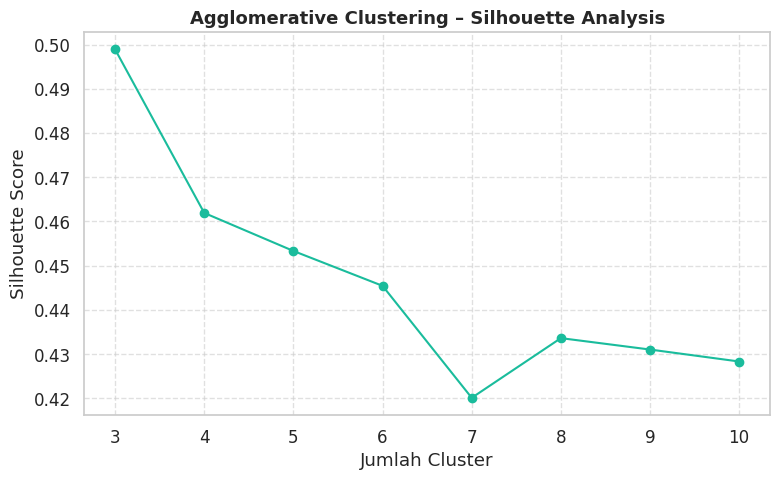

In [36]:
# Cari range jumlah cluster
range_n_clusters = range(3, 11)
agg_scores = []

for n in range_n_clusters:
    agg_model = AgglomerativeClustering(n_clusters=n)
    labels = agg_model.fit_predict(scaled_pca)
    score = silhouette_score(scaled_pca, labels)
    agg_scores.append(score)

# Tentukan jumlah cluster optimal berdasarkan silhouette tertinggi
best_n_agg = range_n_clusters[np.argmax(agg_scores)]
best_silhouette = max(agg_scores)

print(f"Jumlah cluster optimal (Agglomerative): {best_n_agg}")
print(f"Silhouette Score tertinggi: {best_silhouette:.3f}")

# Plot tren Silhouette Score
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, agg_scores, marker='o', color='#1abc9c')
plt.title('Agglomerative Clustering – Silhouette Analysis', fontsize=13, fontweight='bold')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Fit model dengan jumlah cluster terbaik
agg_best = AgglomerativeClustering(n_clusters=best_n_agg)
agg_labels = agg_best.fit_predict(scaled_pca)

df_cluster = product_df.copy()
df_cluster['Agg_Cluster'] = agg_labels

Hasil analisis menunjukkan bahwa jumlah cluster optimal adalah 3, dengan nilai Silhouette Score tertinggi sebesar 0.499.
Nilai ini menandakan pemisahan antar cluster cukup baik namun tidak terlalu kuat, artinya masih ada sedikit tumpang tindih antar kelompok data.
Secara umum, model dengan 3 cluster sudah memberikan struktur segmentasi yang paling seimbang — tiap cluster memiliki perbedaan yang cukup jelas tanpa kehilangan banyak variasi data di dalamnya.

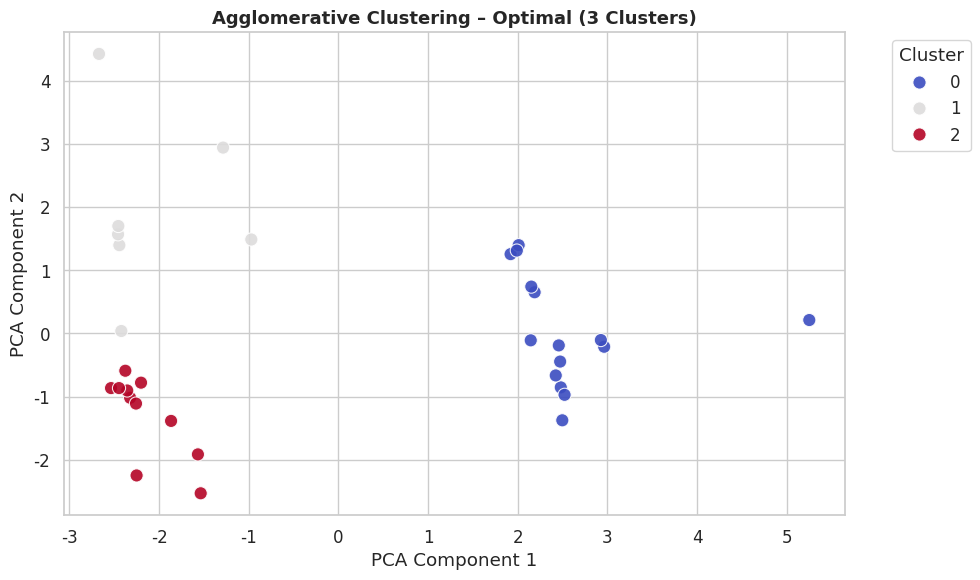

Silhouette Score Agglomerative (optimal=3): 0.499


In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=agg_labels,
    palette='coolwarm',
    s=90, alpha=0.9, edgecolor='white'
)
plt.title(f'Agglomerative Clustering – Optimal ({best_n_agg} Clusters)', fontsize=13, fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

agg_silhouette = silhouette_score(scaled_pca, agg_labels)
print(f"Silhouette Score Agglomerative (optimal={best_n_agg}): {agg_silhouette:.3f}")

Grafik menunjukkan bahwa data berhasil terbagi menjadi tiga klaster utama dengan pemisahan yang cukup jelas antar kelompok.

- Cluster biru (0) tampak paling terpisah dan padat, menandakan kelompok dengan karakteristik yang konsisten.
- Cluster merah (2) memiliki sebaran yang lebih menyebar namun tetap terdefinisi dengan baik.
- Cluster abu-abu (1) berada di posisi tengah, menunjukkan area transisi antar dua kelompok utama.


In [38]:
agg_summary = (
    product_df.copy()
    .assign(Agg_Cluster=agg_labels)  # tambahkan kolom cluster ke product_df
    .groupby('Agg_Cluster')
    .agg({
        'Product_Category': lambda x: x.mode()[0],
        'Product_Brand': lambda x: x.mode()[0],
        'Total_Purchases': 'mean',
        'Ratings': 'mean',
        'Total_Amount': 'mean',
        'Profitability_Index': 'mean'
    })
    .reset_index()
    .rename(columns={
        'Agg_Cluster': 'Cluster',
        'Product_Category': 'Dominant_Category',
        'Product_Brand': 'Dominant_Brand',
        'Total_Purchases': 'Avg_Total_Purchases',
        'Ratings': 'Avg_Ratings',
        'Total_Amount': 'Avg_Total_Amount',
        'Profitability_Index': 'Avg_Profitability_Index'
    })
)

# Tampilkan hasil dengan pewarnaan
display(
    agg_summary.style.background_gradient(
        cmap='YlGnBu',
        subset=['Avg_Total_Purchases', 'Avg_Total_Amount', 'Avg_Profitability_Index']
    ).set_caption("Ringkasan Tiap Cluster – Agglomerative Clustering (Product Level)")
)

,Cluster,Dominant_Category,Dominant_Brand,Avg_Total_Purchases,Avg_Ratings,Avg_Total_Amount,Avg_Profitability_Index
0,0,Books,Adidas,101845.333333,3.121793,25995337.627202,4331221.835954
1,1,Electronics,BlueStar,12678.857143,3.637057,3210780.137912,575482.781106
2,2,Electronics,Pepsi,190.909091,3.009006,47034.998564,8487.001869


Cluster 0 (Books – Adidas) mencerminkan segmen dengan penjualan dan profit tertinggi, menunjukkan performa produk yang kuat dan stabil.
Cluster 1 (Electronics – BlueStar) memiliki rating tertinggi namun skala penjualan menengah, berpotensi tumbuh dengan strategi promosi yang tepat.
Sementara Cluster 2 (Electronics – Pepsi) menunjukkan penjualan dan profit rendah, sehingga perlu evaluasi harga dan strategi pemasaran untuk meningkatkan daya saing.

In [39]:
from IPython.display import HTML, display

html_table = """
<h4 style="font-size:18px; margin-bottom:10px;">📊 Interpretasi Segmentasi Produk (Berdasarkan Centroid Aktual – Agglomerative Clustering):</h4>
<table style="width:100%; border-collapse:collapse; text-align:left; font-family:Arial, sans-serif; border:1px solid #555; color:#f5f5f5;">
  <thead style="background-color:#222;">
    <tr>
      <th style="padding:10px; border:1px solid #555;">Cluster</th>
      <th style="padding:10px; border:1px solid #555;">Kategori & Brand Dominan</th>
      <th style="padding:10px; border:1px solid #555;">Karakteristik Produk</th>
      <th style="padding:10px; border:1px solid #555;">Implikasi Inventory</th>
      <th style="padding:10px; border:1px solid #555;">Nama Segmen</th>
    </tr>
  </thead>
  <tbody>

    <!-- Cluster 0 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 0</td>
      <td style="padding:10px; border:1px solid #555;">Books – Adidas</td>
      <td style="padding:10px; border:1px solid #555;">Segmen dengan penjualan dan profit tertinggi. Rating stabil menunjukkan produk populer dan performa kuat.</td>
      <td style="padding:10px; border:1px solid #555;">Pertahankan stok tinggi dan optimalkan distribusi untuk menjaga performa penjualan.</td>
      <td style="padding:10px; border:1px solid #555; color:#42a5f5;">🔵 High-Performer Segment</td>
    </tr>

    <!-- Cluster 1 -->
    <tr style="background-color:#252525;">
      <td style="padding:10px; border:1px solid #555;">Cluster 1</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – BlueStar</td>
      <td style="padding:10px; border:1px solid #555;">Memiliki rating tertinggi dengan volume transaksi menengah. Menunjukkan kepuasan pelanggan tinggi.</td>
      <td style="padding:10px; border:1px solid #555;">Jaga kualitas produk dan manfaatkan ulasan positif untuk memperkuat branding.</td>
      <td style="padding:10px; border:1px solid #555; color:#ba68c8;">🟣 Trusted Mid-Tier Electronics</td>
    </tr>

    <!-- Cluster 2 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 2</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – Pepsi</td>
      <td style="padding:10px; border:1px solid #555;">Penjualan dan profit terendah dengan pelanggan terbatas. Rating stabil namun daya saing rendah.</td>
      <td style="padding:10px; border:1px solid #555;">Perlu strategi promosi dan evaluasi harga untuk meningkatkan minat pasar.</td>
      <td style="padding:10px; border:1px solid #555; color:#ffb300;">🟠 Low-Tier Electronics</td>
    </tr>

  </tbody>
</table>
"""
display(HTML(html_table))

Cluster,Kategori & Brand Dominan,Karakteristik Produk,Implikasi Inventory,Nama Segmen
Cluster 0,Books – Adidas,Segmen dengan penjualan dan profit tertinggi. Rating stabil menunjukkan produk populer dan performa kuat.,Pertahankan stok tinggi dan optimalkan distribusi untuk menjaga performa penjualan.,🔵 High-Performer Segment
Cluster 1,Electronics – BlueStar,Memiliki rating tertinggi dengan volume transaksi menengah. Menunjukkan kepuasan pelanggan tinggi.,Jaga kualitas produk dan manfaatkan ulasan positif untuk memperkuat branding.,🟣 Trusted Mid-Tier Electronics
Cluster 2,Electronics – Pepsi,Penjualan dan profit terendah dengan pelanggan terbatas. Rating stabil namun daya saing rendah.,Perlu strategi promosi dan evaluasi harga untuk meningkatkan minat pasar.,🟠 Low-Tier Electronics


# DBSCAN (Density-Based Spatial Clustering)

In [40]:
eps_values = [0.8, 1.0, 1.2, 1.4, 1.6]
dbscan_results = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(scaled_pca)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(scaled_pca, labels)
        dbscan_results.append({'eps': eps, 'n_clusters': n_clusters, 'score': score})
    else:
        dbscan_results.append({'eps': eps, 'n_clusters': n_clusters, 'score': None})

dbscan_df = pd.DataFrame(dbscan_results)
print("\nHasil DBSCAN (percobaan berbagai eps):")
display(dbscan_df)
# Pilih hasil terbaik
dbscan_df_valid = dbscan_df.dropna(subset=['score'])
best_eps = dbscan_df_valid.loc[dbscan_df_valid['score'].idxmax(), 'eps'] if not dbscan_df_valid.empty else 1.2


Hasil DBSCAN (percobaan berbagai eps):


,eps,n_clusters,score
0,0.8,0,NaN
1,1.0,1,NaN
2,1.2,2,0.052057
3,1.4,2,0.262527
4,1.6,2,0.341753


- Pada nilai eps = 0.8 dan 1.0, model gagal membentuk cluster bermakna (semua titik dianggap noise atau hanya 1 cluster).
- Mulai eps = 1.2, DBSCAN berhasil membentuk 2 cluster, dengan silhouette score meningkat dari 0.05 → 0.34 seiring naiknya eps.
- Nilai eps = 1.6 menghasilkan kualitas cluster terbaik (score = 0.34), menandakan pemisahan antar cluster cukup jelas dan stabil.







In [41]:
dbscan_best = DBSCAN(eps=best_eps, min_samples=5)
db_labels = dbscan_best.fit_predict(scaled_pca)
n_dbscan_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)

if n_dbscan_clusters > 1:
    dbscan_silhouette = silhouette_score(scaled_pca, db_labels)
    print(f"\nDBSCAN optimal dengan eps={best_eps}, cluster={n_dbscan_clusters}, silhouette={dbscan_silhouette:.3f}")
else:
    dbscan_silhouette = None
    print("\nDBSCAN hanya mendeteksi 1 cluster atau semua dianggap noise.")


DBSCAN optimal dengan eps=1.6, cluster=2, silhouette=0.342


> Parameter terbaik untuk DBSCAN pada dataset ini adalah eps ≈ 1.6, karena memberikan keseimbangan terbaik antara jumlah cluster dan kualitas segmentasi.

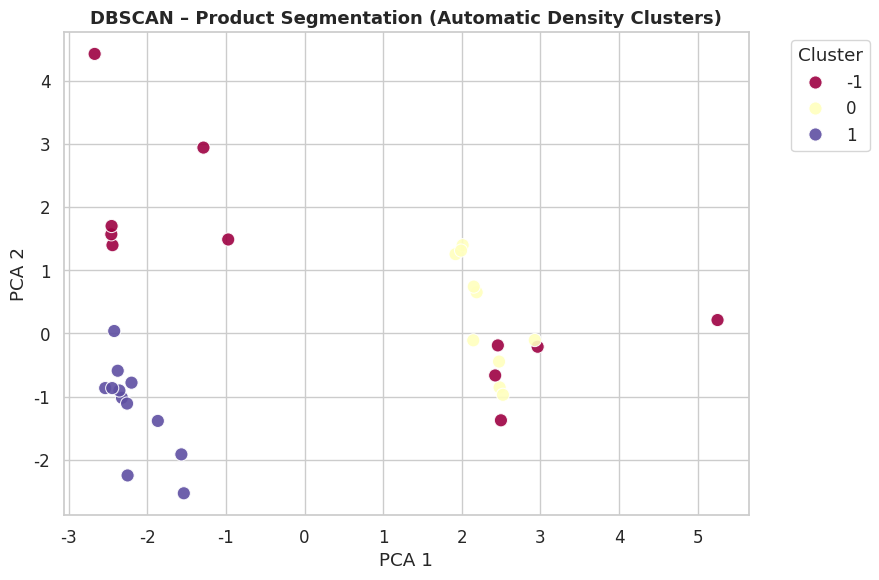

In [42]:
# Visualisasi
plt.figure(figsize=(9,6))
sns.scatterplot(
    x=pca_result[:,0],
    y=pca_result[:,1],
    hue=db_labels,
    palette='Spectral',
    s=90, alpha=0.9, edgecolor='white'
)
plt.title('DBSCAN – Product Segmentation (Automatic Density Clusters)', fontsize=13, fontweight='bold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik menunjukkan hasil segmentasi produk menggunakan DBSCAN dengan eps optimal (≈1.6):
- Terbentuk 2 cluster utama (kuning = Cluster 0, ungu = Cluster 1) serta beberapa titik noise (merah = -1) yang tidak termasuk ke kelompok manapun.
- Cluster 0 (kuning) cenderung berkumpul di area tengah, menunjukkan produk dengan karakteristik moderat dan serupa satu sama lain.
- Cluster 1 (ungu) terpisah jelas di sisi kiri bawah, menandakan kelompok produk dengan pola berbeda (mungkin dari segi harga, profit, atau rating).
- Noise (-1) tersebar acak, menunjukkan adanya produk dengan perilaku unik atau ekstrem (outlier).

Kesimpulan:

DBSCAN berhasil mengidentifikasi dua segmen produk utama dan sejumlah produk anomali, yang bisa menjadi fokus untuk analisis lebih lanjut—misalnya mengkaji produk outlier untuk strategi harga atau stok yang lebih efisien.

In [43]:
# Ringkasan hasil DBSCAN
product_dbscan = product_df.copy()
product_dbscan['Cluster_DBSCAN'] = db_labels

print("Jumlah produk per cluster (DBSCAN):")
print(product_dbscan['Cluster_DBSCAN'].value_counts().sort_index())
print("\n")

dbscan_summary = (
    product_dbscan[product_dbscan['Cluster_DBSCAN'] != -1]
    .groupby('Cluster_DBSCAN')
    .agg({
        'Product_Category': lambda x: x.mode()[0],
        'Product_Brand': lambda x: x.mode()[0],
        'Total_Purchases': 'mean',
        'Total_Amount': 'mean',
        'Ratings': 'mean',
        'Unique_Customers': 'mean',
        'Profitability_Index': 'mean'
    })
    .reset_index()
    .rename(columns={
        'Product_Category': 'Dominant_Category',
        'Product_Brand': 'Dominant_Brand',
        'Total_Purchases': 'Avg_Total_Purchases',
        'Total_Amount': 'Avg_Total_Amount',
        'Ratings': 'Avg_Ratings',
        'Unique_Customers': 'Avg_Unique_Customers',
        'Profitability_Index': 'Avg_Profitability_Index'
    })
)

display(
    dbscan_summary.style
    .background_gradient(
        cmap='YlOrBr',
        subset=['Avg_Total_Purchases', 'Avg_Total_Amount', 'Avg_Profitability_Index']
    )
    .set_caption("Ringkasan Tiap Cluster – DBSCAN (Density-Based Product Clustering)")
    .format({
        'Avg_Total_Purchases': '{:,.0f}',
        'Avg_Total_Amount': '{:,.0f}',
        'Avg_Ratings': '{:.2f}',
        'Avg_Unique_Customers': '{:,.0f}',
        'Avg_Profitability_Index': '{:,.0f}'
    })
)


Jumlah produk per cluster (DBSCAN):
Cluster_DBSCAN
-1    11
 0    10
 1    12
Name: count, dtype: int64




,Cluster_DBSCAN,Dominant_Category,Dominant_Brand,Avg_Total_Purchases,Avg_Total_Amount,Avg_Ratings,Avg_Unique_Customers,Avg_Profitability_Index
0,0,Books,Adidas,"97,572","24,920,501",3.11,"16,363","4,179,188"
1,1,Electronics,Pepsi,184,"45,392",3.03,33,"8,120"


Berdasarkan hasil DBSCAN, terdapat dua segmen utama produk. Cluster 0 didominasi oleh kategori Books dengan merek Adidas, memiliki rata-rata pembelian dan nilai transaksi yang tinggi, menunjukkan segmen produk dengan performa penjualan kuat dan profit besar. Sementara itu, Cluster 1 didominasi oleh Electronics merek Pepsi, dengan rata-rata pembelian dan nilai transaksi yang jauh lebih rendah, menandakan segmen dengan aktivitas pasar rendah dan profitabilitas terbatas.

In [44]:
from IPython.display import HTML, display

html_table = """
<h4 style="font-size:18px; margin-bottom:10px;">📊 Interpretasi Segmentasi Produk (Berdasarkan DBSCAN – Density-Based Clustering):</h4>
<table style="width:100%; border-collapse:collapse; text-align:left; font-family:Arial, sans-serif; border:1px solid #555; color:#f5f5f5;">
  <thead style="background-color:#222;">
    <tr>
      <th style="padding:10px; border:1px solid #555;">Cluster</th>
      <th style="padding:10px; border:1px solid #555;">Kategori & Brand Dominan</th>
      <th style="padding:10px; border:1px solid #555;">Karakteristik Produk</th>
      <th style="padding:10px; border:1px solid #555;">Implikasi Inventory</th>
      <th style="padding:10px; border:1px solid #555;">Nama Segmen</th>
    </tr>
  </thead>
  <tbody>

    <!-- Cluster 0 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 0</td>
      <td style="padding:10px; border:1px solid #555;">Books – Adidas</td>
      <td style="padding:10px; border:1px solid #555;">Segmen dengan rata-rata pembelian dan profit tertinggi. Menunjukkan performa kuat dan potensi pasar besar.</td>
      <td style="padding:10px; border:1px solid #555;">Pertahankan ketersediaan stok dan kelola distribusi untuk menjaga konsistensi penjualan.</td>
      <td style="padding:10px; border:1px solid #555; color:#42a5f5;">🔵 High-Performer Segment</td>
    </tr>

    <!-- Cluster 1 -->
    <tr style="background-color:#252525;">
      <td style="padding:10px; border:1px solid #555;">Cluster 1</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – Pepsi</td>
      <td style="padding:10px; border:1px solid #555;">Segmen dengan pembelian dan profit paling rendah, menunjukkan aktivitas pasar rendah meski rating stabil.</td>
      <td style="padding:10px; border:1px solid #555;">Perlu peningkatan promosi atau reposisi produk agar lebih kompetitif.</td>
      <td style="padding:10px; border:1px solid #555; color:#ffb300;">🟠 Low-Value Electronics</td>
    </tr>

  </tbody>
</table>
"""
display(HTML(html_table))

Cluster,Kategori & Brand Dominan,Karakteristik Produk,Implikasi Inventory,Nama Segmen
Cluster 0,Books – Adidas,Segmen dengan rata-rata pembelian dan profit tertinggi. Menunjukkan performa kuat dan potensi pasar besar.,Pertahankan ketersediaan stok dan kelola distribusi untuk menjaga konsistensi penjualan.,🔵 High-Performer Segment
Cluster 1,Electronics – Pepsi,"Segmen dengan pembelian dan profit paling rendah, menunjukkan aktivitas pasar rendah meski rating stabil.",Perlu peningkatan promosi atau reposisi produk agar lebih kompetitif.,🟠 Low-Value Electronics


# Perbandingan Hasil Model

In [45]:
comparison = pd.DataFrame({
    'Model': ['K-Means', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [
        round(sil_kmeans, 3),
        round(agg_silhouette, 3),
        round(dbscan_silhouette, 3) if dbscan_silhouette else 'N/A'
    ],
    'Jumlah Cluster': [
        optimal_k,
        best_n_agg,
        n_dbscan_clusters if n_dbscan_clusters > 0 else 'N/A'
    ]
})

# Terapkan style seperti contoh
styled_compare = (
    comparison
    .style
    .background_gradient(cmap='YlGnBu', subset=['Silhouette Score'])
    .set_caption("Perbandingan Model Clustering – Product Segmentation")
    .set_table_styles([
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '17px'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('color', 'white'),
             ('background-color', '#1F2937'),
             ('padding', '10px'),
             ('border-radius', '8px'),
             ('letter-spacing', '0.5px')
         ]},
        {'selector': 'th',
         'props': [
             ('background-color', '#374151'),
             ('color', 'white'),
             ('font-size', '14px'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('padding', '8px'),
             ('border', '1px solid #4B5563')
         ]},
        {'selector': 'td',
         'props': [
             ('text-align', 'center'),
             ('font-size', '13px'),
             ('padding', '8px'),
             ('border', '1px solid #E5E7EB'),
             ('color', '#111827')
         ]}
    ])
    # Tambahkan warna bergaris setiap baris
    .apply(lambda x: [
        'background-color: #F3F4F6' if i % 2 == 0 else 'background-color: #E5E7EB'
        for i in range(len(x))
    ], axis=0)
)

display(styled_compare)

,Model,Silhouette Score,Jumlah Cluster
0,K-Means,0.475000,4
1,Agglomerative,0.499000,3
2,DBSCAN,0.342000,2


- K-Means : Cepat, mudah dipahami, hasil stabil (baik untuk segmentasi inventori reguler).
- Agglomerative : Menunjukkan hubungan hierarki antar produk (berguna untuk produk berlapis/seri).
- DBSCAN : Bagus untuk mendeteksi produk “unik” atau “outlier”, misalnya item eksklusif atau seasonal.

# MODEL TERBAIK (Agglomerative Clustering)

In [46]:
product_clustered = product_df.copy()
product_clustered['Cluster'] = agg_labels

print("Jumlah produk per cluster:")
print(product_clustered['Cluster'].value_counts().sort_index())

Jumlah produk per cluster:
Cluster
0    15
1     7
2    11
Name: count, dtype: int64


## Hitung fitur rata-rata & kategori dominan per cluster

In [47]:
cluster_summary = (
    product_clustered.groupby('Cluster')
    .agg({
        'Product_Category': lambda x: x.mode()[0],
        'Product_Brand': lambda x: x.mode()[0],
        'Total_Purchases': 'mean',
        'Total_Amount': 'mean',
        'Ratings': 'mean',
        'Unique_Customers': 'mean',
        'Profitability_Index': 'mean'
    })
    .reset_index()
)

cluster_summary.columns = [
    'Cluster',
    'Dominant_Category',
    'Dominant_Brand',
    'Avg_Total_Purchases',
    'Avg_Total_Amount',
    'Avg_Ratings',
    'Avg_Unique_Customers',
    'Avg_Profitability_Index'
]

In [48]:
styled_summary = (
    cluster_summary.style
    .background_gradient(
        cmap='Blues',
        subset=['Avg_Total_Purchases', 'Avg_Total_Amount', 'Avg_Profitability_Index']
    )
    .set_caption("Ringkasan Tiap Cluster – Agglomerative Clustering (Hierarchical)")
    .format({
        'Avg_Total_Purchases': '{:,.0f}',
        'Avg_Total_Amount': '{:,.0f}',
        'Avg_Ratings': '{:.2f}',
        'Avg_Unique_Customers': '{:,.0f}',
        'Avg_Profitability_Index': '{:,.0f}'
    })
    .set_table_styles([
        {'selector': 'caption',
         'props': [
             ('caption-side', 'top'),
             ('font-size', '17px'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('color', 'white'),
             ('background-color', '#1F2937'),
             ('padding', '10px'),
             ('border-radius', '8px'),
             ('letter-spacing', '0.4px')
         ]},
        {'selector': 'th',
         'props': [
             ('background-color', '#374151'),
             ('color', 'white'),
             ('font-size', '14px'),
             ('font-weight', 'bold'),
             ('text-align', 'center'),
             ('padding', '8px'),
             ('border', '1px solid #4B5563')
         ]},
        {'selector': 'td',
         'props': [
             ('text-align', 'center'),
             ('font-size', '13px'),
             ('padding', '8px'),
             ('border', '1px solid #D1D5DB'),
             ('color', '#111827')
         ]}
    ])
    .apply(lambda x: [
        'background-color: #F9FAFB' if i % 2 == 0 else 'background-color: #E5E7EB'
        for i in range(len(x))
    ], axis=0)
)

display(styled_summary)

,Cluster,Dominant_Category,Dominant_Brand,Avg_Total_Purchases,Avg_Total_Amount,Avg_Ratings,Avg_Unique_Customers,Avg_Profitability_Index
0,0,Books,Adidas,"101,845","25,995,338",3.12,"16,969","4,331,222"
1,1,Electronics,BlueStar,"12,679","3,210,780",3.64,"2,273","575,483"
2,2,Electronics,Pepsi,191,"47,035",3.01,35,"8,487"


## Visualisasi PCA hasil clustering

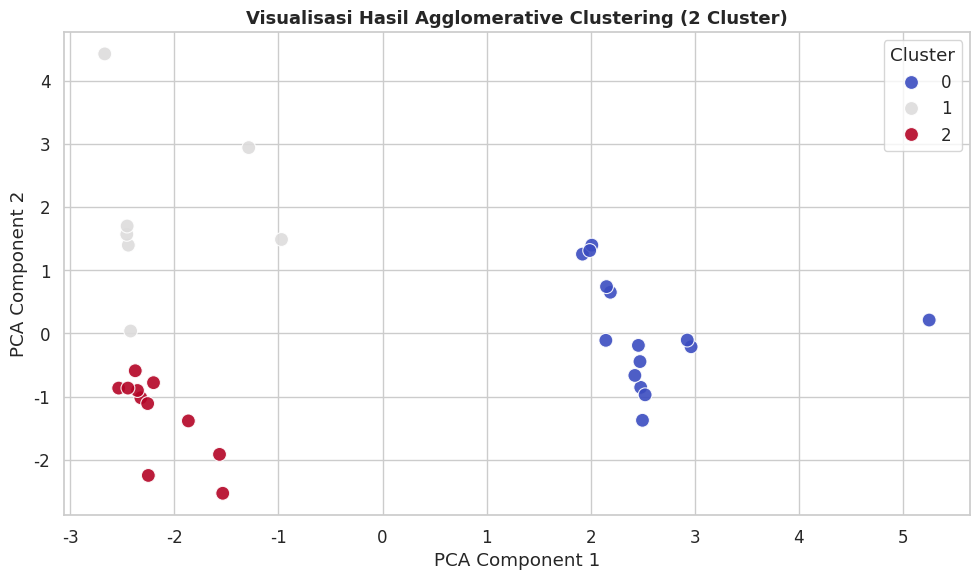

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=product_clustered['Cluster'],
    palette='coolwarm',
    s=100,
    alpha=0.9,
    edgecolor='white'
)
plt.title('Visualisasi Hasil Agglomerative Clustering (2 Cluster)', fontsize=13, fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

In [50]:
from IPython.display import HTML, display

html_table = """
<h4 style="font-size:18px; margin-bottom:10px;">Interpretasi Segmentasi Produk (Berdasarkan Centroid Aktual – Agglomerative Clustering):</h4>
<table style="width:100%; border-collapse:collapse; text-align:left; font-family:Arial, sans-serif; border:1px solid #555; color:#f5f5f5;">
  <thead style="background-color:#222;">
    <tr>
      <th style="padding:10px; border:1px solid #555;">Cluster</th>
      <th style="padding:10px; border:1px solid #555;">Kategori & Brand Dominan</th>
      <th style="padding:10px; border:1px solid #555;">Karakteristik Produk</th>
      <th style="padding:10px; border:1px solid #555;">Implikasi Inventory</th>
      <th style="padding:10px; border:1px solid #555;">Nama Segmen</th>
    </tr>
  </thead>
  <tbody>

    <!-- Cluster 0 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 0</td>
      <td style="padding:10px; border:1px solid #555;">Books – Adidas</td>
      <td style="padding:10px; border:1px solid #555;">Segmen dengan penjualan dan profit tertinggi. Rating stabil menunjukkan produk populer dan performa kuat.</td>
      <td style="padding:10px; border:1px solid #555;">Pertahankan stok tinggi dan optimalkan distribusi untuk menjaga performa penjualan.</td>
      <td style="padding:10px; border:1px solid #555; color:#42a5f5;">🔵 High-Performer Segment</td>
    </tr>

    <!-- Cluster 1 -->
    <tr style="background-color:#252525;">
      <td style="padding:10px; border:1px solid #555;">Cluster 1</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – BlueStar</td>
      <td style="padding:10px; border:1px solid #555;">Memiliki rating tertinggi dengan volume transaksi menengah. Menunjukkan kepuasan pelanggan tinggi.</td>
      <td style="padding:10px; border:1px solid #555;">Jaga kualitas produk dan manfaatkan ulasan positif untuk memperkuat branding.</td>
      <td style="padding:10px; border:1px solid #555; color:#ba68c8;">🟣 Trusted Mid-Tier Electronics</td>
    </tr>

    <!-- Cluster 2 -->
    <tr style="background-color:#2c2c2c;">
      <td style="padding:10px; border:1px solid #555;">Cluster 2</td>
      <td style="padding:10px; border:1px solid #555;">Electronics – Pepsi</td>
      <td style="padding:10px; border:1px solid #555;">Penjualan dan profit terendah dengan pelanggan terbatas. Rating stabil namun daya saing rendah.</td>
      <td style="padding:10px; border:1px solid #555;">Perlu strategi promosi dan evaluasi harga untuk meningkatkan minat pasar.</td>
      <td style="padding:10px; border:1px solid #555; color:#ffb300;">🟠 Low-Tier Electronics</td>
    </tr>

  </tbody>
</table>
"""
display(HTML(html_table))

Cluster,Kategori & Brand Dominan,Karakteristik Produk,Implikasi Inventory,Nama Segmen
Cluster 0,Books – Adidas,Segmen dengan penjualan dan profit tertinggi. Rating stabil menunjukkan produk populer dan performa kuat.,Pertahankan stok tinggi dan optimalkan distribusi untuk menjaga performa penjualan.,🔵 High-Performer Segment
Cluster 1,Electronics – BlueStar,Memiliki rating tertinggi dengan volume transaksi menengah. Menunjukkan kepuasan pelanggan tinggi.,Jaga kualitas produk dan manfaatkan ulasan positif untuk memperkuat branding.,🟣 Trusted Mid-Tier Electronics
Cluster 2,Electronics – Pepsi,Penjualan dan profit terendah dengan pelanggan terbatas. Rating stabil namun daya saing rendah.,Perlu strategi promosi dan evaluasi harga untuk meningkatkan minat pasar.,🟠 Low-Tier Electronics


# SIMPAN MODEL

In [51]:
import joblib
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Folder penyimpanan di Google Drive
SAVE_DIR = "/content/drive/MyDrive/FINAL PROJECT DS/Models/"
os.makedirs(SAVE_DIR, exist_ok=True)


joblib.dump(scaler, os.path.join(SAVE_DIR, "scaler.pkl"))
joblib.dump(pca_stage1, os.path.join(SAVE_DIR, "pca_stage1.pkl"))
joblib.dump(pca_stage2, os.path.join(SAVE_DIR, "pca_stage2.pkl"))
joblib.dump(kmeans, os.path.join(SAVE_DIR, "kmeans.pkl"))
joblib.dump(agg_best, os.path.join(SAVE_DIR, "agg_best.pkl"))
joblib.dump(dbscan_best, os.path.join(SAVE_DIR, "dbscan_best.pkl"))

print("Model preprocessing & clustering berhasil disimpan.\n")


product_clustered_full = product_df.copy()

product_clustered_full["K-Means_Cluster"] = kmeans_labels
product_clustered_full["Agglomerative_Cluster"] = agg_labels
product_clustered_full["DBSCAN_Cluster"] = db_labels

# Simpan dataset hasil clustering
product_csv_path = os.path.join(SAVE_DIR, "product_clustered.csv")
product_clustered_full.to_csv(product_csv_path, index=False)
print(f"Dataset produk hasil clustering disimpan ke: {product_csv_path}\n")


data_copy = data.copy()

if "Product_Category" in data_copy.columns:
    data_copy["Product_Category"] = data_copy["Product_Category"].fillna("Unknown")
    data_sampled, _ = train_test_split(
        data_copy,
        test_size=0.8,
        stratify=data_copy["Product_Category"],
        random_state=42
    )
else:
    data_sampled = data_copy.sample(frac=0.2, random_state=42)

# Simpan hasil sampling
sales_csv_path = os.path.join(SAVE_DIR, "sales_sampled.csv")
data_sampled.to_csv(sales_csv_path, index=False)

print(f"Sampling 20% dari dataframe 'data' berhasil disimpan ke: {sales_csv_path}")
print(f"Jumlah data sample: {len(data_sampled)} baris.")

✅ Model preprocessing & clustering berhasil disimpan.

Dataset produk hasil clustering disimpan ke: /content/drive/MyDrive/FINAL PROJECT DS/Models/product_clustered.csv

Sampling 20% dari dataframe 'data' berhasil disimpan ke: /content/drive/MyDrive/FINAL PROJECT DS/Models/sales_sampled.csv
Jumlah data sample: 60402 baris.
